In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import pingouin as pg
from mdi_computation import mdi_compute, smdi_compute
%matplotlib widget

<h1 align="center">Organizing and Loading Data</h1>

In [2]:
scan_numbers = [16, 24, 32, 48, 72]
os.makedirs("./compiled_spectral_data", exist_ok=True)

for number in scan_numbers:
    compiled_df = pd.DataFrame()
    dpt_paths = glob.glob(f"./raw_spectral_files/{number} scans/*.dpt")

    for count, path in enumerate(dpt_paths, start=1):
        spectral_data = pd.read_csv(path, names=["wavenumber", "absorbance"])
        compiled_df[f"scan{number}_replicate{count}"] = spectral_data["absorbance"]

        if count == 1:
            wavenumber = pd.DataFrame()
            wavenumber["wavenumber"] = spectral_data["wavenumber"]
            wavenumber.to_csv("./compiled_spectral_data/wavenumber.csv", index=False)

    compiled_df.to_csv(
        f"./compiled_spectral_data/mango_trichomes_{number}_scans.csv", index=False
    )

In [3]:
compiled_csv_paths = glob.glob("./compiled_spectral_data/*scans.csv")
wavenumber = pd.read_csv("./compiled_spectral_data/wavenumber.csv")
scan_16, scan_24, scan_32, scan_48, scan_72 = [
    pd.read_csv(path) for path in compiled_csv_paths
]

scan_number_dataframes = [scan_16, scan_24, scan_32, scan_48, scan_72]

for df in scan_number_dataframes:
    df["average"] = df.mean(axis=1)

<h1 align="center">Visualizing Spectra</h1>

In [4]:
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]

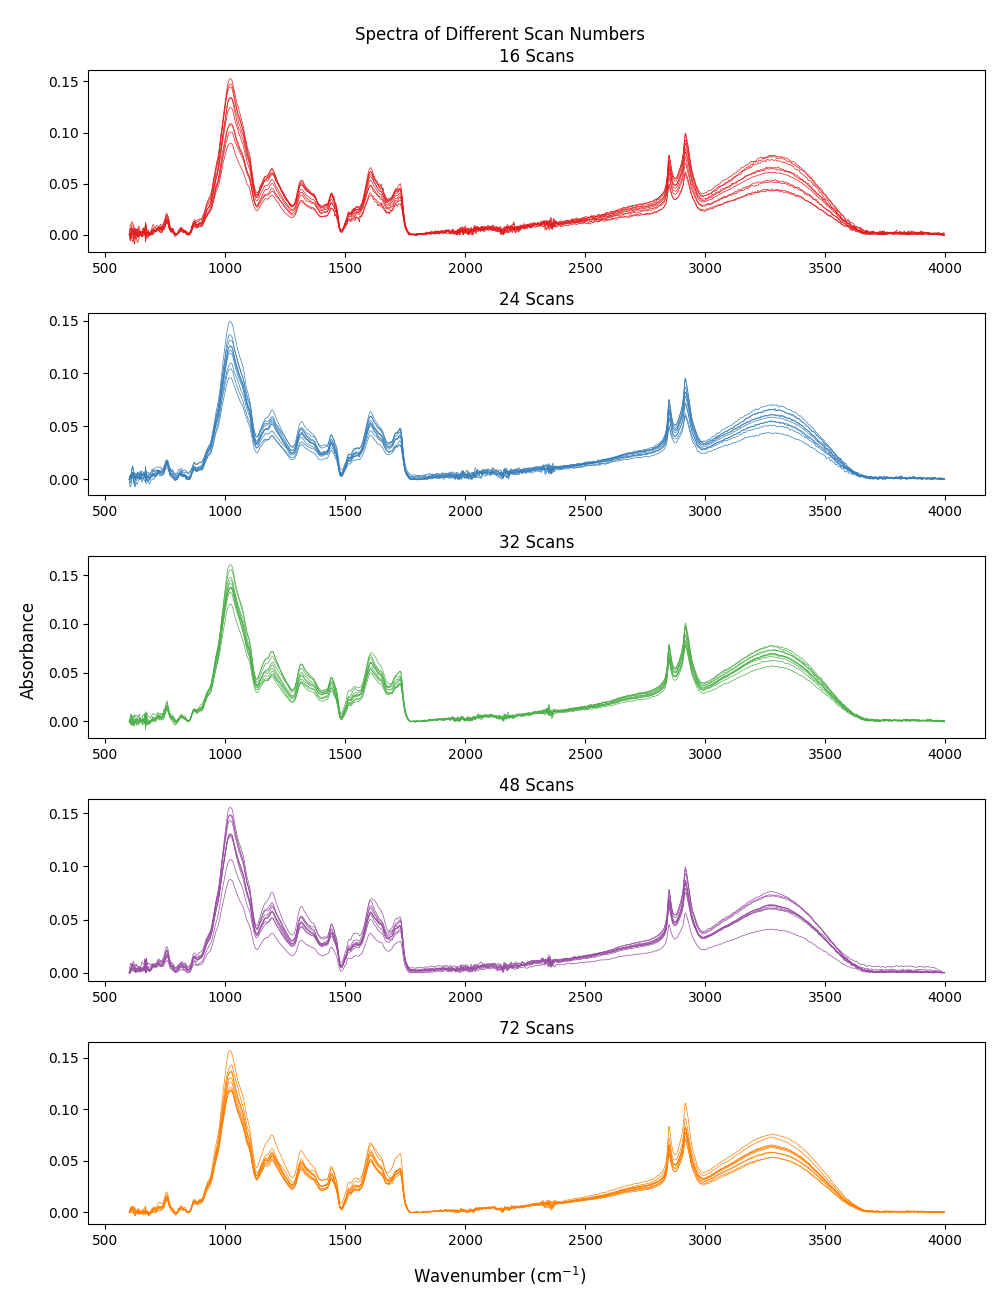

In [5]:
all_scans_fig, asf_axes = plt.subplots(5, 1, figsize=(10, 13))

for axis, number, color, df in zip(
    asf_axes, scan_numbers, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        axis.plot(wavenumber, spectrum, color=color, linewidth=0.5)

    axis.set(title=f"{number} Scans")

all_scans_fig.suptitle("Spectra of Different Scan Numbers")
all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
all_scans_fig.supylabel("Absorbance")

all_scans_fig.tight_layout()

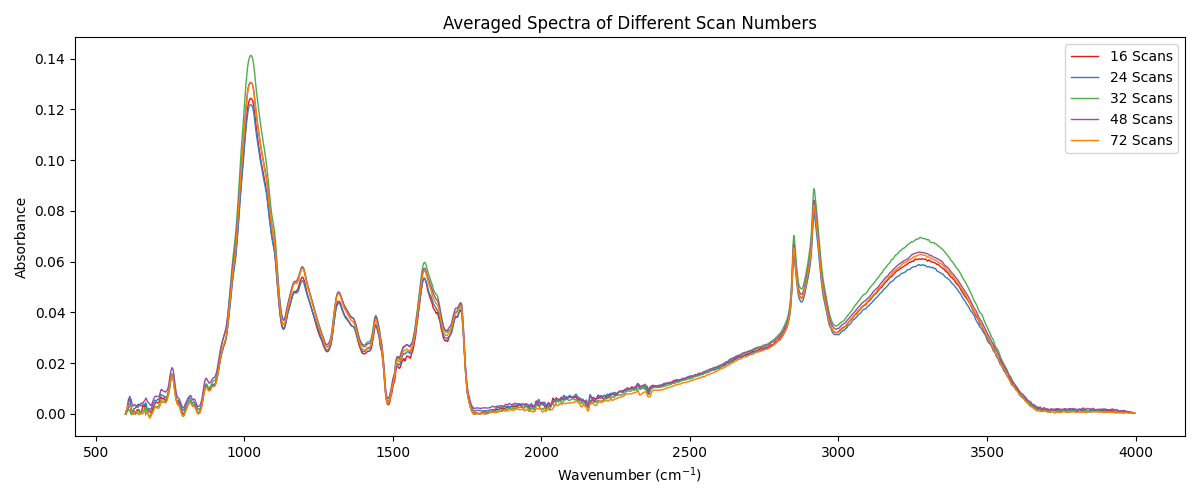

In [6]:
ave_scans_fig, ave_axes = plt.subplots(1, 1, figsize=(12, 5))

for number, color, df in zip(scan_numbers, colors, scan_number_dataframes):
    spectrum = df["average"]
    ave_axes.plot(
        wavenumber, spectrum, color=color, linewidth=1, label=f"{number} Scans"
    )

ave_axes.legend()
ave_axes.set(
    title="Averaged Spectra of Different Scan Numbers",
    xlabel="Wavenumber (cm$^{-1}$)",
    ylabel="Absorbance",
)
ave_scans_fig.tight_layout()

<h1 align="center">MDI Computation & Analysis</h1>

In [7]:
mdi_compute("compiled_spectral_data", "mdi_results")
smdi_compute("mdi_results", "mdi_results")

In [8]:
mdi_results = pd.read_csv("./mdi_results/master_mdi.csv")
smdi_results = pd.read_csv("./mdi_results/master_smdi.csv")

In [9]:
mdi_results

,mango_trichomes_16_scans_mdi,mango_trichomes_24_scans_mdi,mango_trichomes_32_scans_mdi,mango_trichomes_48_scans_mdi,mango_trichomes_72_scans_mdi
0,-0.011419,-0.011663,-0.011691,-0.011634,-0.011529
1,-0.012387,-0.012061,-0.011646,-0.012135,-0.012156
2,-0.011460,-0.011393,-0.011648,-0.011259,-0.011796
3,-0.011796,-0.011687,-0.011370,-0.011197,-0.011632
4,-0.011732,-0.012451,-0.012024,-0.011862,-0.011477
5,-0.012148,-0.011443,-0.011804,-0.011369,-0.011723
6,-0.011543,-0.011615,-0.011930,-0.011592,-0.012007
7,-0.013187,-0.011936,-0.011802,-0.011441,-0.012097
8,-0.012535,-0.011623,-0.011064,-0.011580,-0.011543


In [10]:
smdi_results

,mango_trichomes_16_scans_mdi,mango_trichomes_24_scans_mdi,mango_trichomes_32_scans_mdi,mango_trichomes_48_scans_mdi,mango_trichomes_72_scans_mdi
0,0.832801,0.717785,0.704585,0.731598,0.781121
1,0.376734,0.530241,0.725897,0.495757,0.485558
2,0.813646,0.845274,0.724956,0.908104,0.655363
3,0.655413,0.706446,0.855700,0.937153,0.732467
4,0.685304,0.346650,0.547871,0.624159,0.805462
5,0.489599,0.821479,0.651421,0.856402,0.689685
6,0.774411,0.740693,0.592353,0.751492,0.556116
7,0.000000,0.589360,0.652519,0.822324,0.513559
8,0.306982,0.736937,1.000000,0.757171,0.774645


<h2 align="center">Visualization</h2>

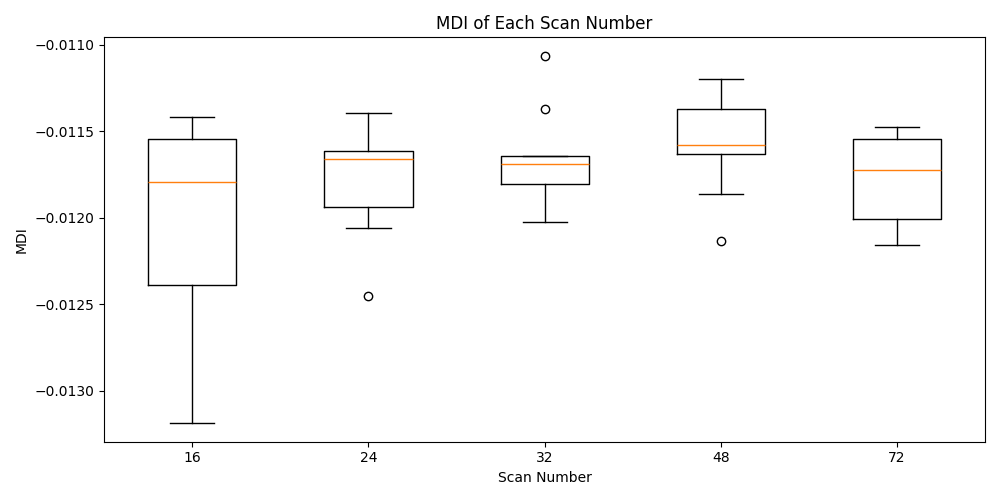

In [11]:
plt.close("all")
mdi_box, box_axis = plt.subplots(1, 1, figsize=(10, 5))

pooled_mdi_data = [mdi_results[column] for column in mdi_results.columns]

box_axis.boxplot(x=pooled_mdi_data)
box_axis.set(
    title="MDI of Each Scan Number",
    xlabel="Scan Number",
    ylabel="MDI",
    xticklabels=scan_numbers,
)

mdi_box.tight_layout()

<h2 align="center">Statistical Analyses</h2>

<h3 align="center">Test for Normality (Shapiro-Wilk Test)</h3>

In [12]:
pg.normality(mdi_results, method="normaltest", alpha=0.05).round(3)

c:\Users\UST\Desktop\Juswa\mango_ftir_optimization\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


,W,pval,normal
mango_trichomes_16_scans_mdi,1.875,0.392,True
mango_trichomes_24_scans_mdi,3.442,0.179,True
mango_trichomes_32_scans_mdi,3.345,0.188,True
mango_trichomes_48_scans_mdi,1.488,0.475,True
mango_trichomes_72_scans_mdi,2.048,0.359,True


<h3 align="center">Test for Homogeneity of Variances (Levene's Test)</h3>

In [13]:
pg.homoscedasticity(mdi_results, method="levene").round(3)

,W,pval,equal_var
levene,1.581,0.198,True


<h3 align="center">Group Comparison (One-Way ANOVA)</h3>

In [14]:
mdi_results_melted = mdi_results.melt(var_name="scan_number", value_name="mdi")

In [15]:
pg.anova(mdi_results_melted, dv="mdi", between="scan_number", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,scan_number,0.000001,4,2.637892e-07,1.876903,0.13338,0.15803
1,Within,0.000006,40,1.405449e-07,NaN,NaN,NaN
